                                                class  count
0                                  Apple___Apple_scab    630
1                                   Apple___Black_rot    621
2                            Apple___Cedar_apple_rust    275
3                                     Apple___healthy   1645
4                                 Blueberry___healthy   1502
5                   Cherry_(including_sour)___healthy    854
6            Cherry_(including_sour)___Powdery_mildew   1052
7   Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...    513
8                         Corn_(maize)___Common_rust_   1192
9                              Corn_(maize)___healthy   1162
10                Corn_(maize)___Northern_Leaf_Blight    985
11                                  Grape___Black_rot   1180
12                       Grape___Esca_(Black_Measles)   1383
13                                    Grape___healthy    423
14         Grape___Leaf_blight_(Isariopsis_Leaf_Spot)   1076
15           Orange___Ha

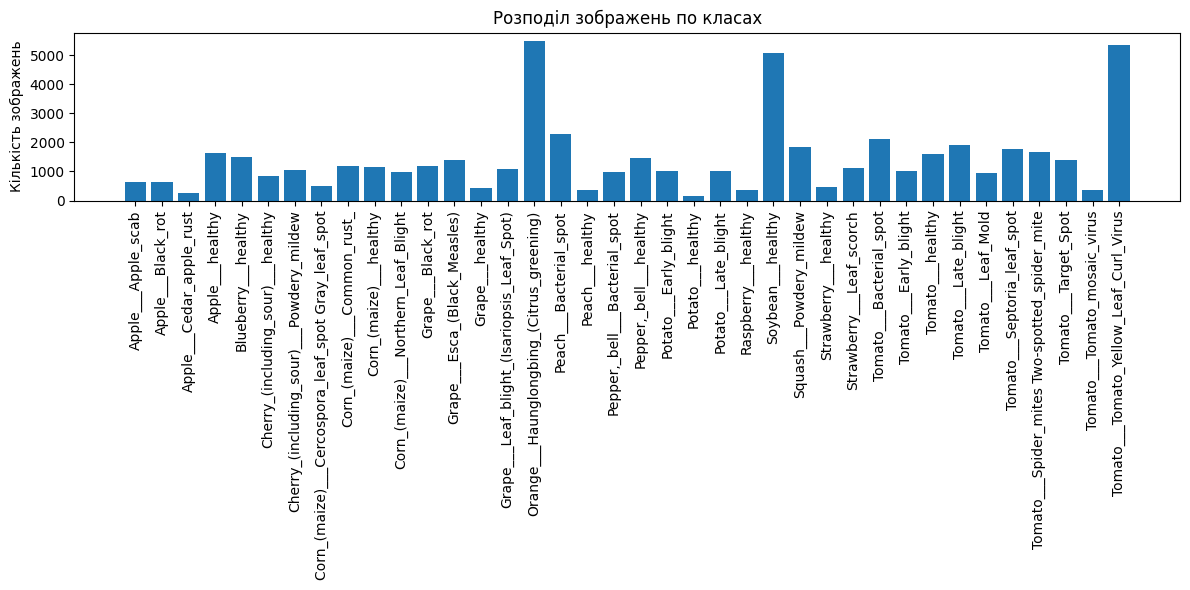

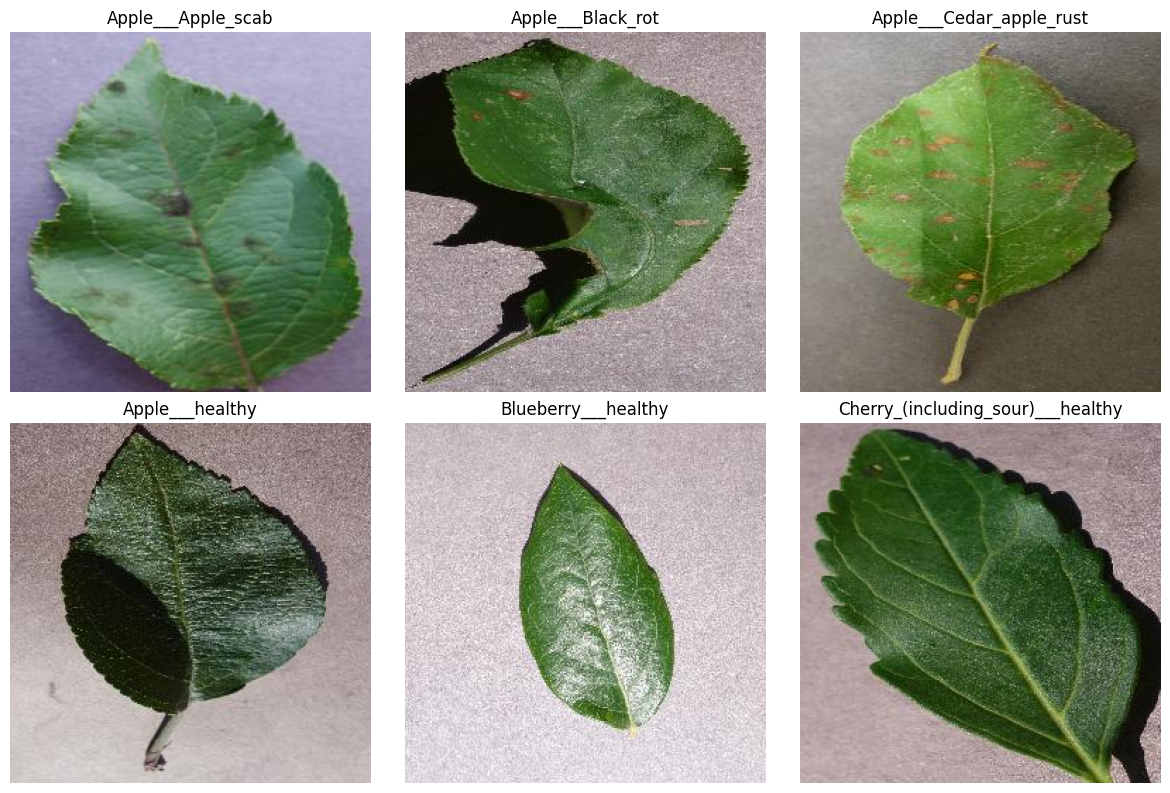

In [7]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Шлях до папки з кольоровими зображеннями
root = Path("../../data/plantvillage/raw/color")

# Збираємо назви класів і кількість файлів у кожному
counts = []
for cls_dir in sorted(root.iterdir()):
    if cls_dir.is_dir():
        n = len(list(cls_dir.glob("*.*")))
        counts.append({"class": cls_dir.name, "count": n})

# Створюємо DataFrame
df = pd.DataFrame(counts)
print(df)

# Будуємо гістограму розподілу кількості зображень по класах
plt.figure(figsize=(12, 6))
plt.bar(df["class"], df["count"])
plt.xticks(rotation=90)
plt.title("Розподіл зображень по класах")
plt.ylabel("Кількість зображень")
plt.tight_layout()
plt.show()

# Відображаємо по одному прикладу з перших шести класів
sample_classes = df["class"].tolist()[:6]
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for ax, cls in zip(axes.flatten(), sample_classes):
    img_path = next((root/cls).glob("*.*"))
    img = Image.open(img_path)
    ax.imshow(img)
    ax.set_title(cls)
    ax.axis("off")

plt.tight_layout()
plt.show()
